# MNIST DATASET
in this notebook we wanna create a simple model and train it on mnist dataste

### IMPORTS

***general imports***

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

***imports from tensorflow***

In [2]:
import tensorflow 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### LOAD DATA

***loading into train and validation sets***

In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


***checking the number/dimension of data***

In [4]:
print("Dimensions of X_train are:", X_train.shape)
print("Dimensions of y_train are:", y_train.shape)
print("Dimensions of X_valid are:", X_valid.shape)
print("Dimensions of y_valid are:", y_valid.shape)

Dimensions of X_train are: (60000, 28, 28)
Dimensions of y_train are: (60000,)
Dimensions of X_valid are: (10000, 28, 28)
Dimensions of y_valid are: (10000,)


***showing samples***

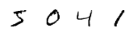

[5 0 4 1]


In [5]:
plt.figure(figsize=(2, 4))
for k in range(4):
  plt.subplot(1, 4, k+1)
  plt.imshow(X_train[k], cmap="Greys")
  plt.axis("off")

plt.tight_layout()
plt.show()


print(y_train[0:4])

### PRE-PROCESS DATA

***re-shape***

In [6]:
X_train = X_train.reshape(-1, 784).astype("float32")
X_valid = X_valid.reshape(-1, 784).astype("float32")

X_train.shape

(60000, 784)

***re-scale***

In [7]:
X_train /= 255
X_valid /= 255

***onehot encoding***

In [8]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

### NEURAL NETWORK

***design neural network architecture***

In [9]:
model = Sequential()
model.add(Dense(64, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


***model config***

In [10]:
model.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

***train model***

In [11]:
model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/50
469/469 [==============================] - 6s 6ms/step - loss: 0.0922 - accuracy: 0.1036 - val_loss: 0.0908 - val_accuracy: 0.1240
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0901 - accuracy: 0.1617 - val_loss: 0.0894 - val_accuracy: 0.2353
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0889 - accuracy: 0.2701 - val_loss: 0.0883 - val_accuracy: 0.3032
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0878 - accuracy: 0.3079 - val_loss: 0.0872 - val_accuracy: 0.3221
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0867 - accuracy: 0.3294 - val_loss: 0.0861 - val_accuracy: 0.3343
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0856 - accuracy: 0.3421 - val_loss: 0.0850 - val_accuracy: 0.3513
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.3605 - val_loss: 0.0839 - val_accuracy: 0.3721
Epoch 

***evaluating model performance***

In [12]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0353 - accuracy: 0.8154


[0.03527908772230148, 0.8154000043869019]

***sample of prediction***

This is the actual number: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1/1 [==============================] - 0s 63ms/step
This is the model prediction: [7]


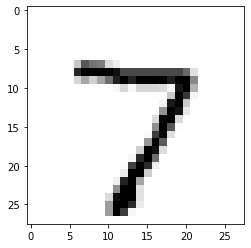

In [13]:
temp_data = X_valid[0].reshape(28, 28)
plt.imshow(temp_data, cmap="Greys")

print("This is the actual number:", y_valid[0])

temp_data = temp_data.reshape(1, 784)
print("This is the model prediction:", np.argmax(model.predict(temp_data), axis=-1))